In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from neuralforecast.models import LSTM

from src.data.loaders import CommodityLoader
from src.models.ensemble.dynamic_selection.dcs_la.dcs_la import DCSLARegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score
)

import warnings
from sklearn.exceptions import UndefinedMetricWarning

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 
}
plt.rcParams.update(dark_style)
rcParams['figure.figsize'] = (18,7)

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [10]:
models = [
    LGBMRegressor(
        n_estimators=1000, 
        learning_rate=0.1, 
        max_depth=10, 
        num_leaves=63, 
        min_child_samples=5, 
        reg_alpha=0, 
        reg_lambda=0.01, 
        random_state=42, 
        verbose=-1
    ),
    # LSTM(
    #     h=1,
    #     input_size=1,
    #     encoder_n_layers=2,
    #     encoder_hidden_size=64,
    #     decoder_layers=2,
    #     decoder_hidden_size=32,
    #     max_steps=500,
    #     learning_rate=0.001,
    #     batch_size=32
    # ),
    XGBRegressor(
        n_estimators=50, 
        learning_rate=0.03125, 
        reg_alpha=0, 
        reg_lambda=0.01, 
        max_depth=6, 
        objective='reg:squarederror'
    ),
    MLPRegressor(
        hidden_layer_sizes=(64, 32), 
        activation='relu', 
        solver='adam', 
        learning_rate_init=0.001, 
        max_iter=500, 
        random_state=42
    ),
    RandomForestRegressor(
        n_estimators=5, 
        min_samples_leaf=5, 
        max_depth=5
    ),
    SVR(
        C=10.0,
        gamma=0.5,
        epsilon=0.25
    )
]

models_top_k_10 = [
    LGBMRegressor(
        n_estimators=1000, 
        learning_rate=0.1, 
        max_depth=10, 
        num_leaves=63, 
        min_child_samples=5, 
        reg_alpha=0, 
        reg_lambda=0.01, 
        random_state=42, 
        verbose=-1
    ),
    # LSTM(
    #     h=1,
    #     input_size=12,
    #     encoder_n_layers=2,
    #     encoder_hidden_size=64,
    #     decoder_layers=2,
    #     decoder_hidden_size=32,
    #     max_steps=500,
    #     learning_rate=0.001,
    #     batch_size=32
    # ),
    XGBRegressor(
        n_estimators=50, 
        learning_rate=0.03125, 
        reg_alpha=0, 
        reg_lambda=0.01, 
        max_depth=6, 
        objective='reg:squarederror'
    ),
    MLPRegressor(
        hidden_layer_sizes=(64, 32), 
        activation='relu', 
        solver='adam', 
        learning_rate_init=0.001, 
        max_iter=500, 
        random_state=42
    ),
    RandomForestRegressor(
        n_estimators=5, 
        min_samples_leaf=5, 
        max_depth=5
    ),
    SVR(
        C=10.0,
        gamma=0.5,
        epsilon=0.25
    )
]

In [4]:
# # ==== Modelos padrão ====
# models = [
#     # make_pipeline(
#     #     StandardScaler(),
#     #     LGBMRegressor(
#     #         n_estimators=1000, 
#     #         learning_rate=0.1, 
#     #         max_depth=10, 
#     #         num_leaves=63, 
#     #         min_child_samples=5, 
#     #         reg_alpha=0, 
#     #         reg_lambda=0.01, 
#     #         random_state=42, 
#     #         verbose=-1
#     #     )
#     # ),
#     # make_pipeline(
#     #     StandardScaler(),
#     #     LSTM(
#     #         h=1,
#     #         input_size=1,
#     #         encoder_n_layers=2,
#     #         encoder_hidden_size=64,
#     #         decoder_layers=2,
#     #         decoder_hidden_size=32,
#     #         max_steps=500,
#     #         learning_rate=0.001,
#     #         batch_size=32
#     #     ),
#     # ),
#     make_pipeline(
#         StandardScaler(),
#         XGBRegressor(
#             n_estimators=50, 
#             learning_rate=0.03125, 
#             reg_alpha=0, 
#             reg_lambda=0.01, 
#             max_depth=6, 
#             objective='reg:squarederror'
#         )
#     ),
#     make_pipeline(
#         StandardScaler(),
#         MLPRegressor(
#             hidden_layer_sizes=(64, 32), 
#             activation='relu', 
#             solver='adam', 
#             learning_rate_init=0.001, 
#             max_iter=500, 
#             random_state=42
#         )
#     ),
#     make_pipeline(
#         StandardScaler(),
#         RandomForestRegressor(
#             n_estimators=5, 
#             min_samples_leaf=5, 
#             max_depth=5
#         )
#     ),
#     make_pipeline(
#         StandardScaler(),
#         SVR(
#             C=10.0,
#             gamma=0.5,
#             epsilon=0.25
#         )
#     )
# ]

# # ==== Modelos top_k_10 ====
# models_top_k_10 = [
#     make_pipeline(
#         StandardScaler(),
#         LGBMRegressor(
#             n_estimators=1000, 
#             learning_rate=0.1, 
#             max_depth=10, 
#             num_leaves=63, 
#             min_child_samples=5, 
#             reg_alpha=0, 
#             reg_lambda=0.01, 
#             random_state=42, 
#             verbose=-1
#         )
#     ),
#     # make_pipeline(
#     #     StandardScaler(),
#     #     LSTM(
#     #         h=1,
#     #         input_size=1,
#     #         encoder_n_layers=2,
#     #         encoder_hidden_size=64,
#     #         decoder_layers=2,
#     #         decoder_hidden_size=32,
#     #         max_steps=500,
#     #         learning_rate=0.001,
#     #         batch_size=32
#     #     ),
#     # ),
#     make_pipeline(
#         StandardScaler(),
#         XGBRegressor(
#             n_estimators=50, 
#             learning_rate=0.03125, 
#             reg_alpha=0, 
#             reg_lambda=0.01, 
#             max_depth=6, 
#             objective='reg:squarederror'
#         )
#     ),
#     make_pipeline(
#         StandardScaler(),
#         MLPRegressor(
#             hidden_layer_sizes=(64, 32), 
#             activation='relu', 
#             solver='adam', 
#             learning_rate_init=0.001, 
#             max_iter=500, 
#             random_state=42
#         )
#     ),
#     make_pipeline(
#         StandardScaler(),
#         RandomForestRegressor(
#             n_estimators=5, 
#             min_samples_leaf=5, 
#             max_depth=5
#         )
#     ),
#     make_pipeline(
#         StandardScaler(),
#         SVR(
#             C=10.0,
#             gamma=0.5,
#             epsilon=0.25
#         )
#     )
# ]

In [5]:
df_brl = CommodityLoader.load_all_commodities(currency='BRL', preprocessing=True, monthly_aggregation='mean', limit_date=None)

ദ്ദി・ᴗ・)✧ acucar_santos carregado com sucesso
ദ്ദി・ᴗ・)✧ acucar_sp carregado com sucesso
ദ്ദി・ᴗ・)✧ algodao carregado com sucesso
ദ്ദി・ᴗ・)✧ arroz carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_arabica carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_robusta carregado com sucesso
ദ്ദി・ᴗ・)✧ milho carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_paranagua carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_rs carregado com sucesso


In [6]:
df_brl['unique_id'].unique()

series_test_sizes = {
    "ACUCAR_SANTOS": 20,
    "ACUCAR_SP": 80,
    "ALGODAO": 105,
    "ARROZ": 72,
    "CAFE_ARABICA": 104,
    "CAFE_ROBUSTA": 87,
    "MILHO": 75,
    "SOJA_PARANA": 101,
    "SOJA_PARANAGUA": 70,
    "TRIGO_PARANA": 77,
    "TRIGO_RS": 77
}


=== Série: ACUCAR_SANTOS ===

=== Série: ACUCAR_SANTOS (horizon=20) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
SVR(C=10.0, epsilon=0.25, gamma=0.5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
XGBRegressor(base_score=None, booster=None, callbacks=None,
         

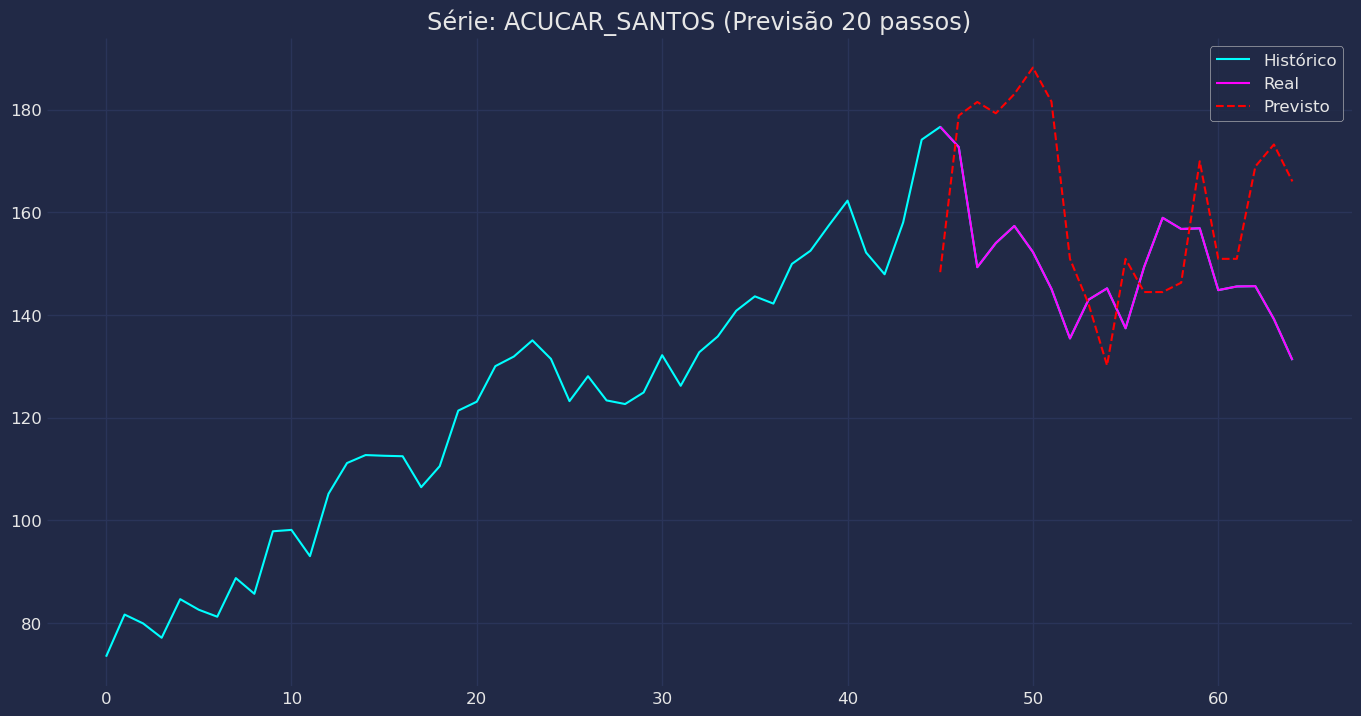


=== Série: ACUCAR_SP ===

=== Série: ACUCAR_SP (horizon=80) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor

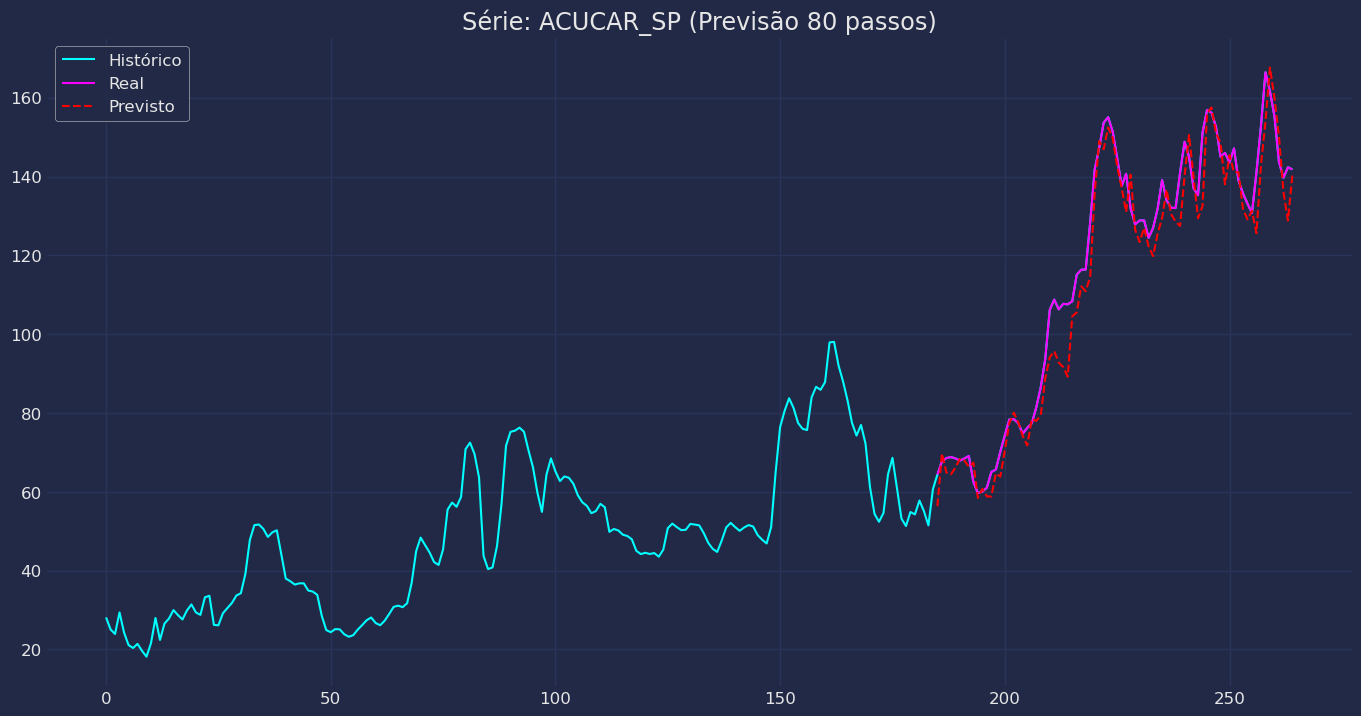


=== Série: ALGODAO ===

=== Série: ALGODAO (horizon=105) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03125, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
         

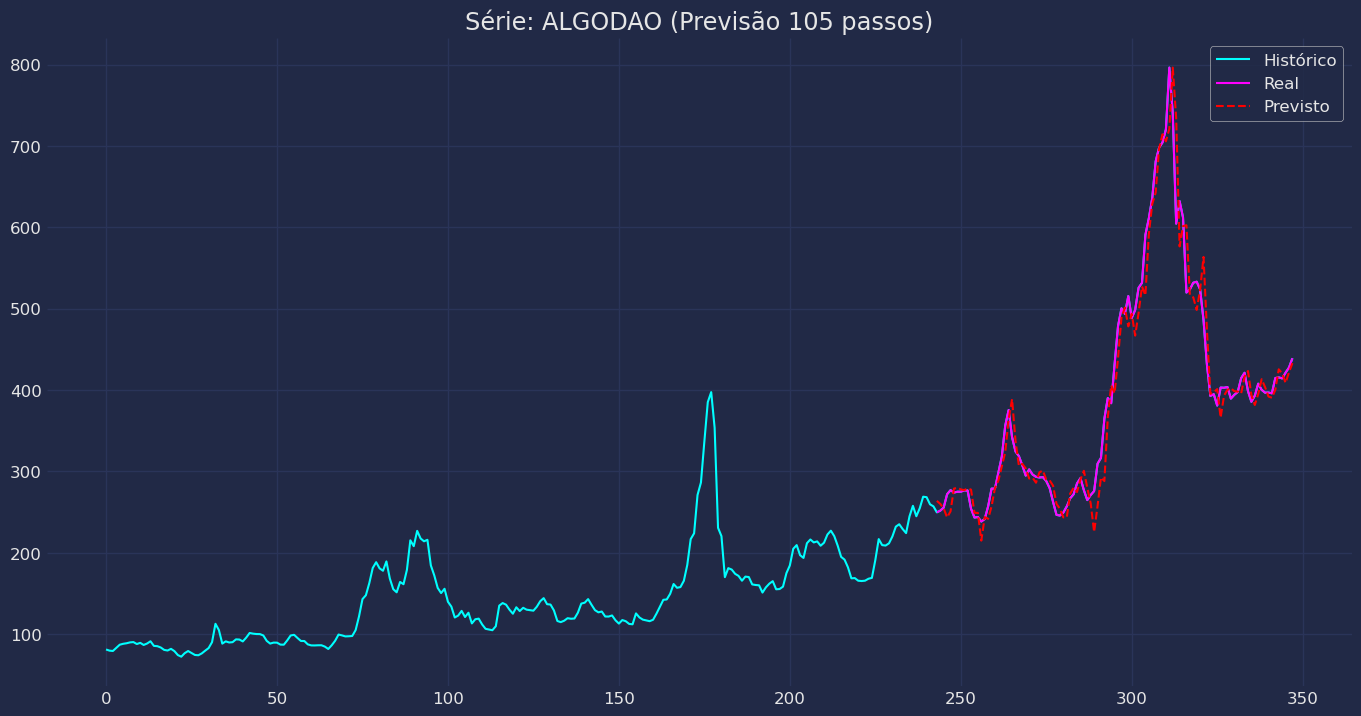


=== Série: ARROZ ===

=== Série: ARROZ (horizon=72) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
    

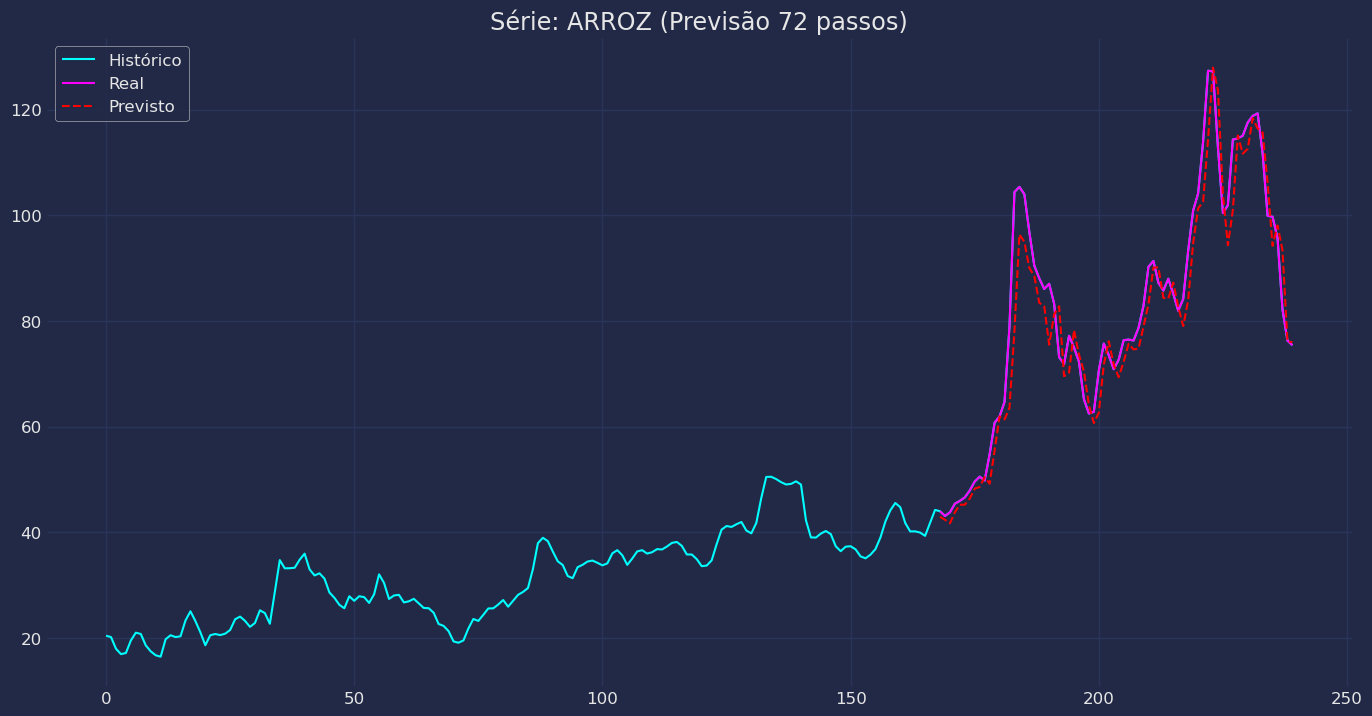


=== Série: CAFE_ARABICA ===

=== Série: CAFE_ARABICA (horizon=104) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
RandomForestRegressor(max_depth=5, min_samples_leaf=5

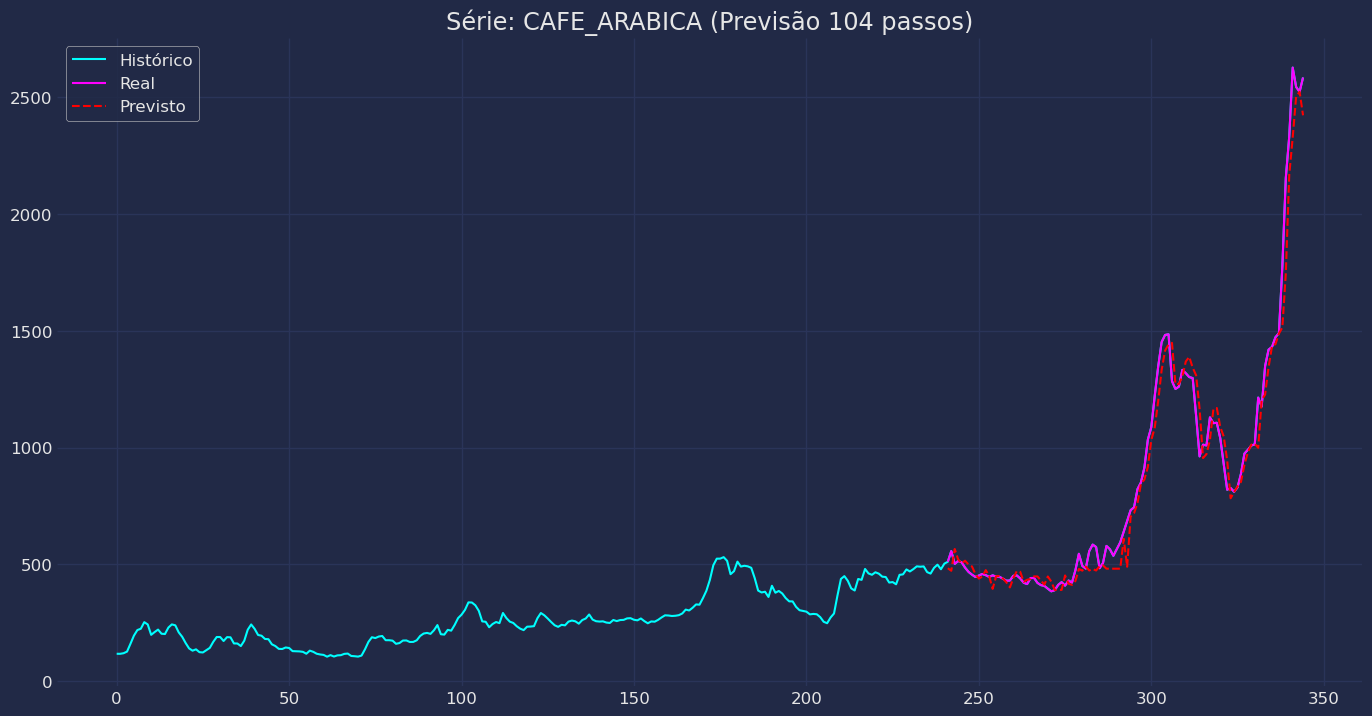


=== Série: CAFE_ROBUSTA ===

=== Série: CAFE_ROBUSTA (horizon=87) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03125, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)
XGBRegresso

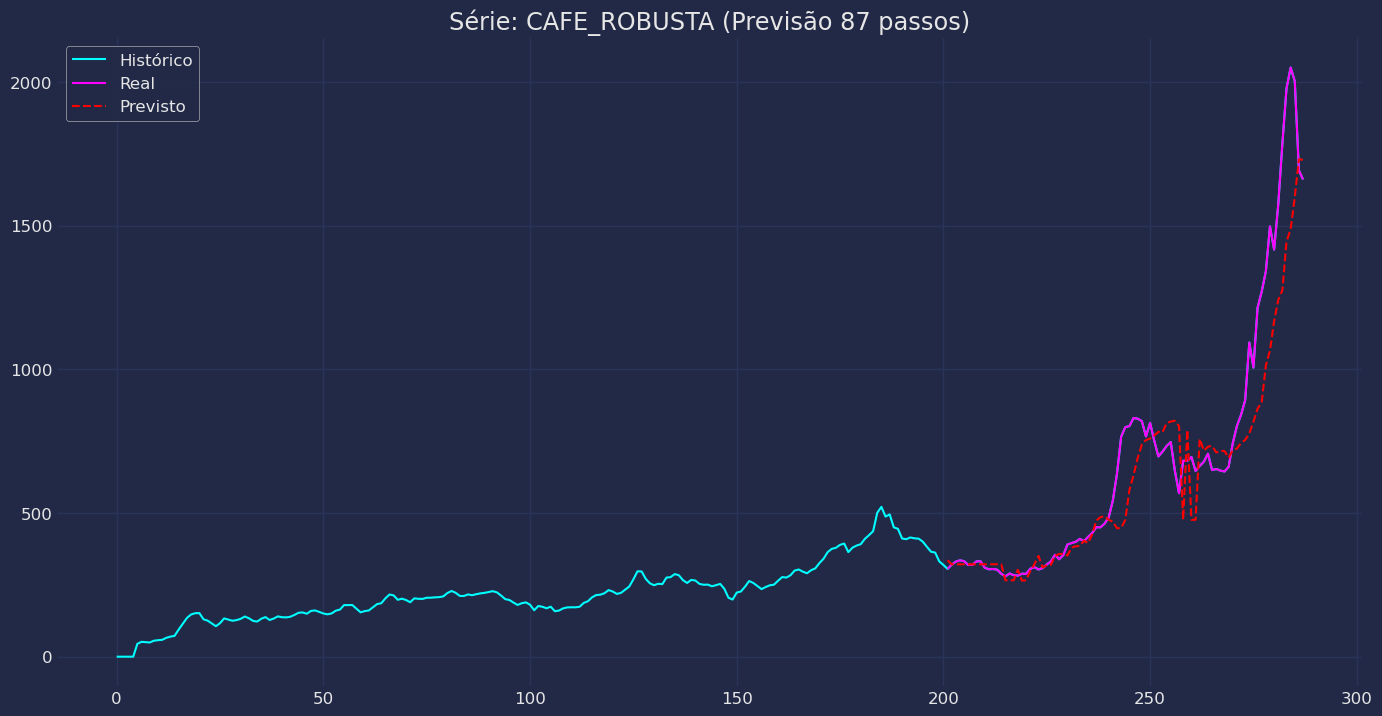


=== Série: MILHO ===

=== Série: MILHO (horizon=75) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
RandomForestRegressor(max_dep

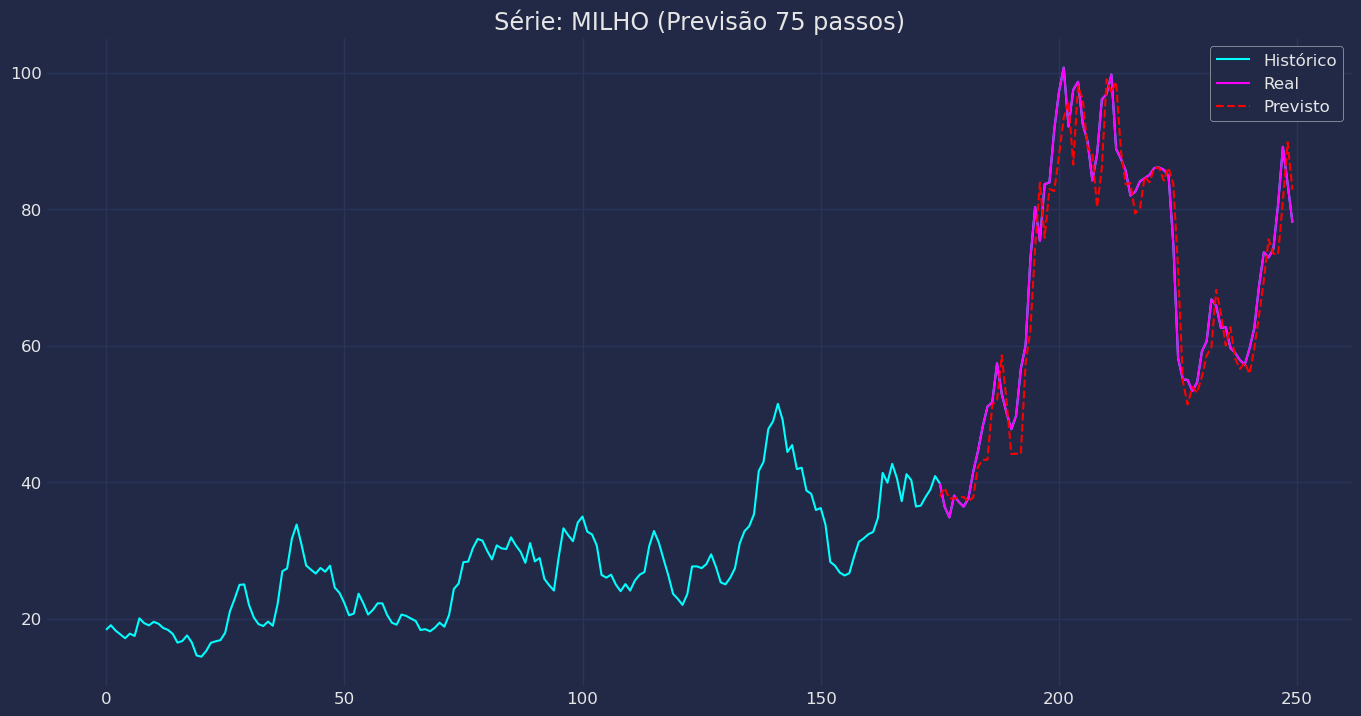


=== Série: SOJA_PARANA ===

=== Série: SOJA_PARANA (horizon=101) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_st

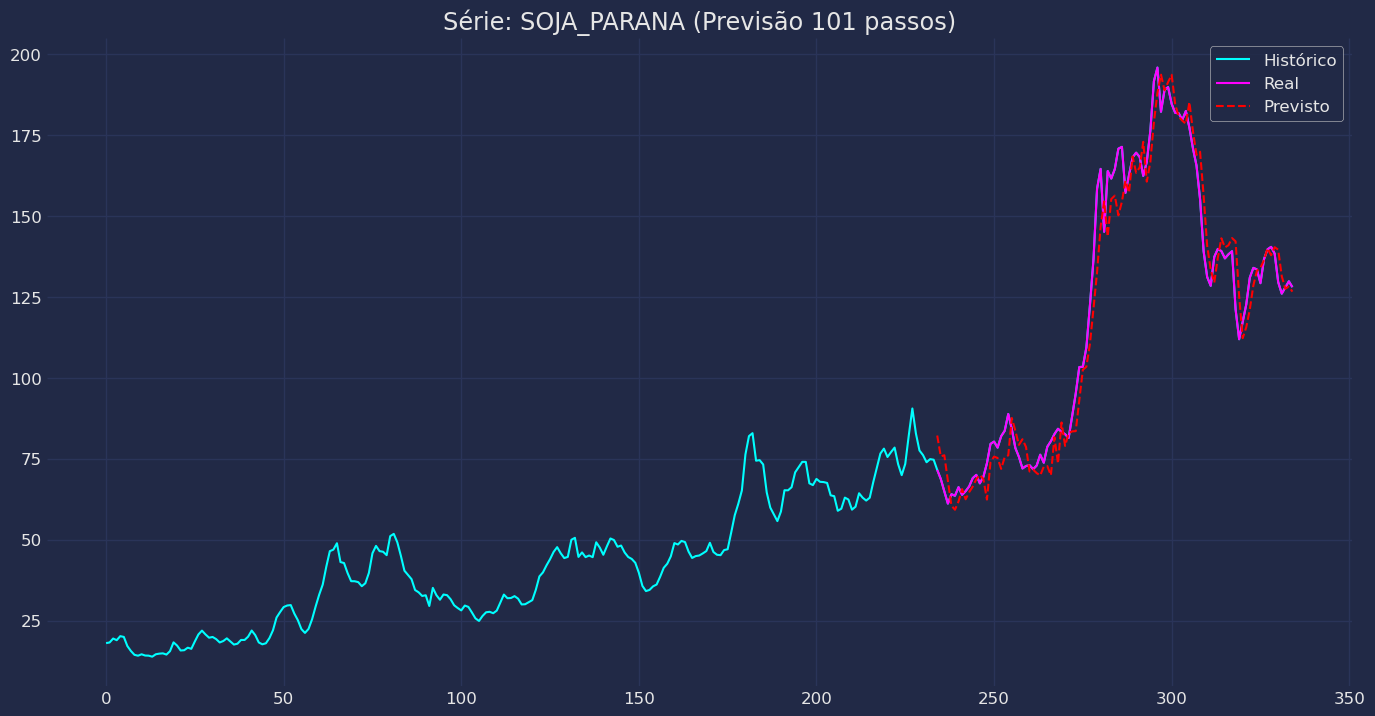


=== Série: SOJA_PARANAGUA ===

=== Série: SOJA_PARANAGUA (horizon=70) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBM

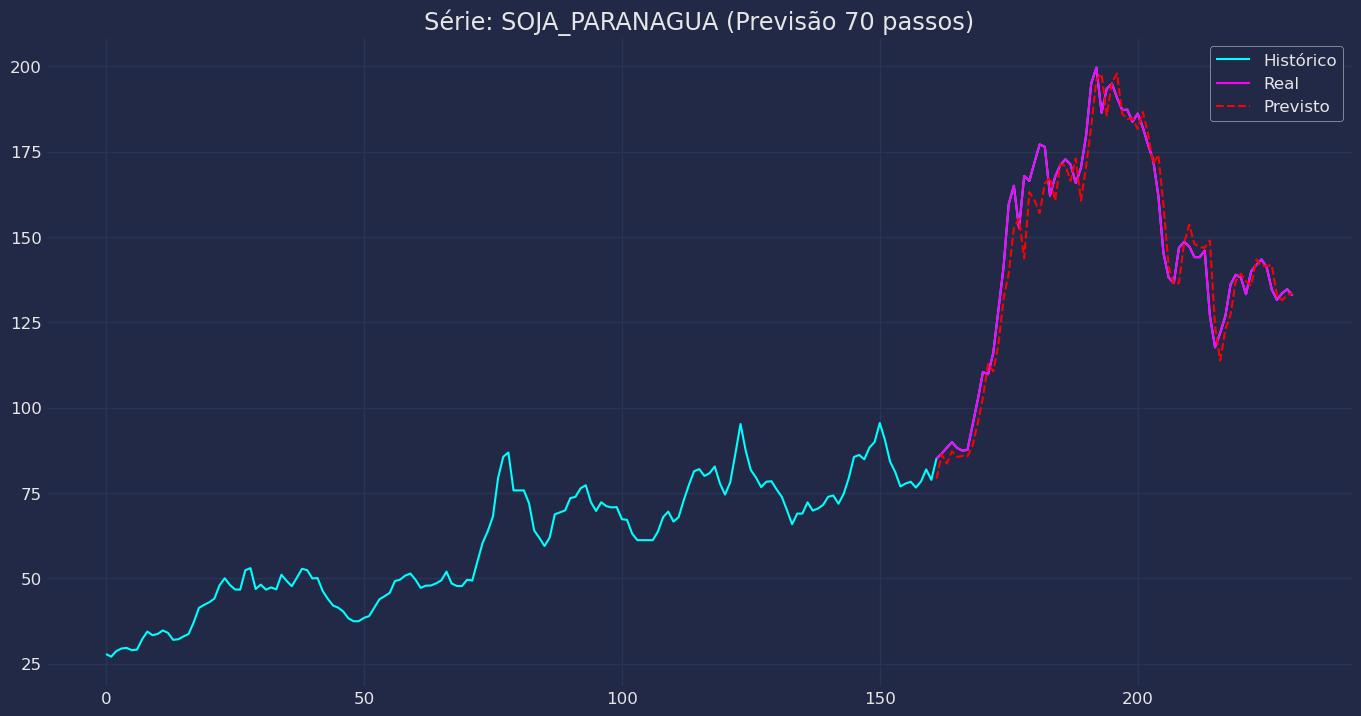


=== Série: TRIGO_PARANA ===

=== Série: TRIGO_PARANA (horizon=77) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
           

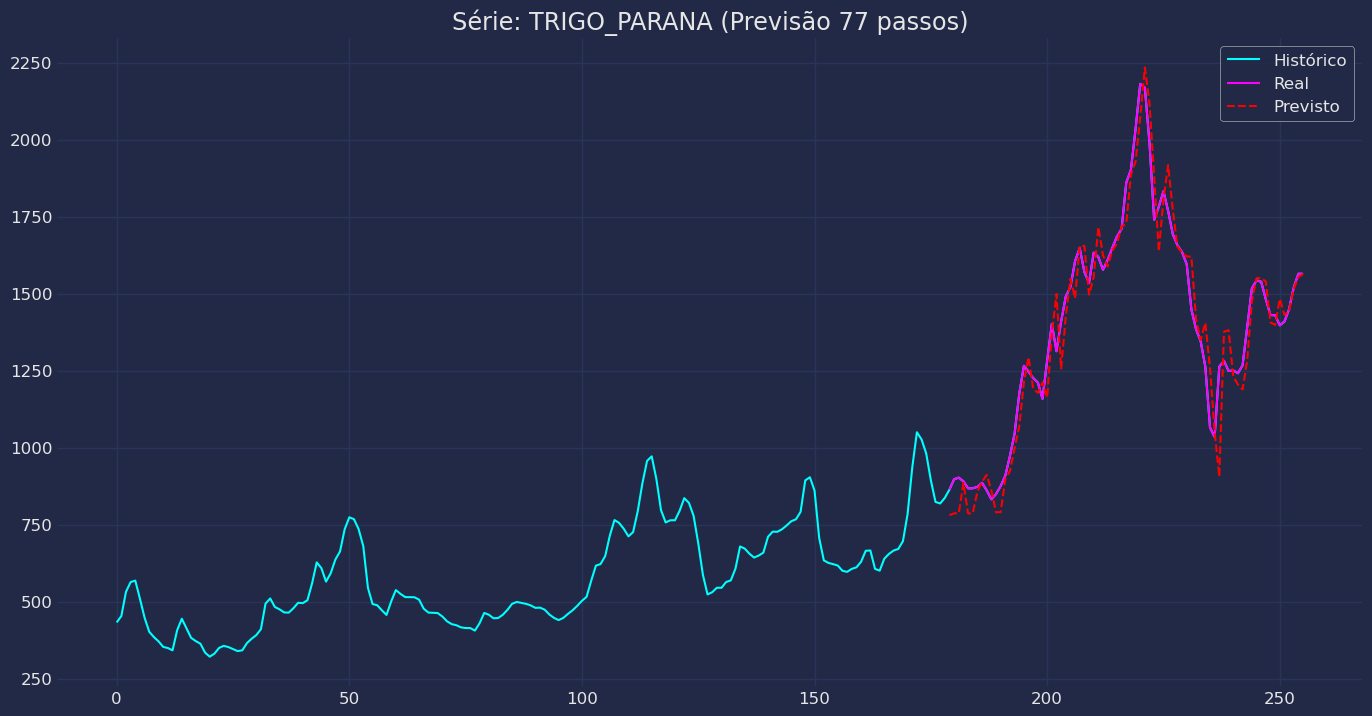


=== Série: TRIGO_RS ===

=== Série: TRIGO_RS (horizon=77) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=5)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03125, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
        

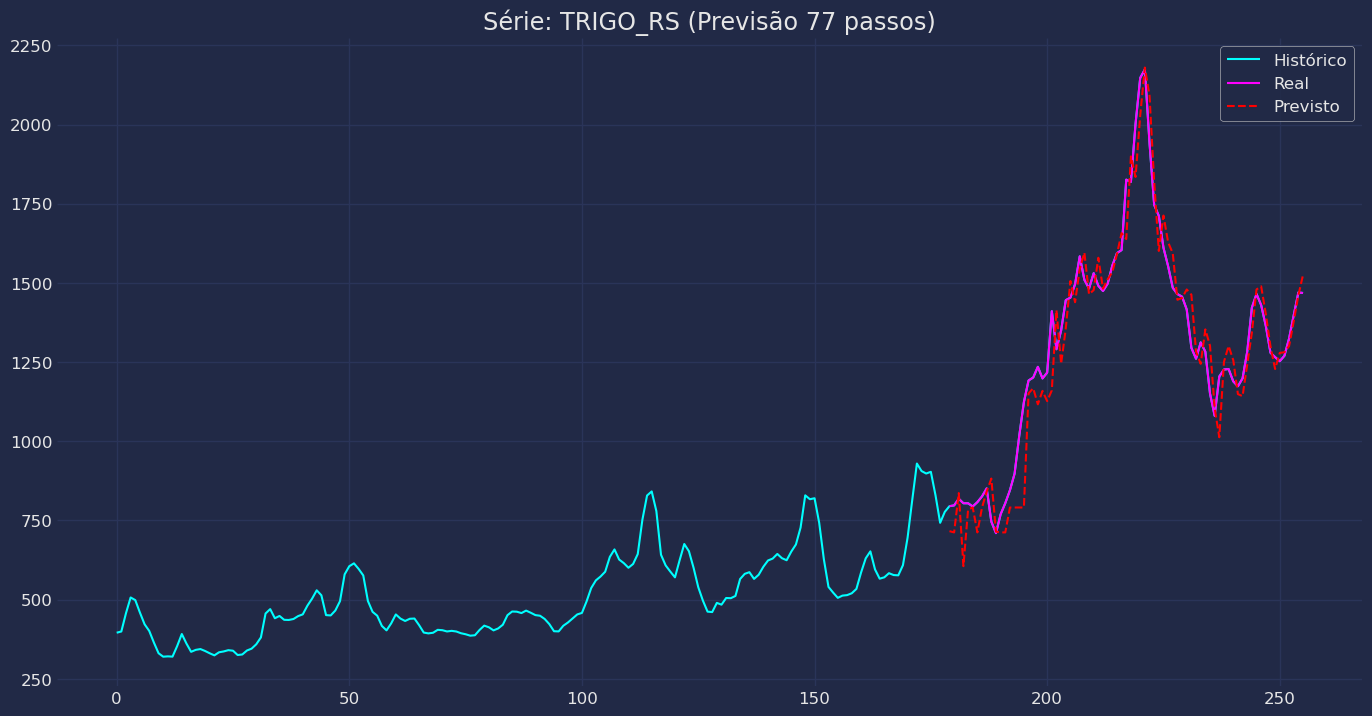


Resumo das métricas:
         unique_id           mse        rmse         mae      mape
0    ACUCAR_SANTOS    497.044116   22.294486   19.070617  0.128536
1        ACUCAR_SP     49.150487    7.010741    5.357307  0.046795
2          ALGODAO    822.718945   28.683078   18.973019  0.047194
3            ARROZ     40.463179    6.361067    4.561922  0.052860
4     CAFE_ARABICA   8193.652569   90.518797   58.903191  0.066203
5     CAFE_ROBUSTA  29757.989511  172.505042  105.566608  0.119115
6            MILHO     26.457057    5.143642    3.959687  0.057788
7      SOJA_PARANA     69.840735    8.357077    6.468287  0.057174
8   SOJA_PARANAGUA     62.625296    7.913615    5.866975  0.040220
9     TRIGO_PARANA   8010.923994   89.503765   66.223169  0.050437
10        TRIGO_RS   9259.425685   96.225910   72.527322  0.059332


In [7]:
dcs = DCSLARegressor(models, top_k=1, similarity='euclidean')

results = []

for uid in df_brl['unique_id'].unique():
    print(f"\n=== Série: {uid} ===")

    horizon = series_test_sizes.get(uid)
    print(f"\n=== Série: {uid} (horizon={horizon}) ===")
    y_series = df_brl[df_brl['unique_id'] == uid]['y'].values

    y_train = y_series[:-horizon]
    windows, targets = dcs._extract_lag_windows(y_train)
    dcs.fit(windows, targets)

    forecast, y_real_future = dcs.predict(y_series, horizon=horizon)

    mse = mean_squared_error(y_real_future, forecast)
    rmse = root_mean_squared_error(y_real_future, forecast)
    mae = mean_absolute_error(y_real_future, forecast)
    mape = mean_absolute_percentage_error(y_real_future, forecast)

    results.append({
        "unique_id": uid,
        "horizon": horizon,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "mape": mape,
        "y_real_future": y_real_future,
        "forecast": forecast
    })

    print("Valores reais:    ", np.round(y_real_future, 2).tolist())
    print("Valores previstos:", np.round(forecast, 2).tolist())
    print(f"MSE: {mse:.2f} | RMSE: {rmse:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")

    # plotar série inteira
    plt.figure(figsize=(15, 8))
    plt.plot(y_series, label="Histórico", color="cyan")
    plt.plot(range(len(y_series)-horizon, len(y_series)), y_real_future, label="Real", color="fuchsia")
    plt.plot(range(len(y_series)-horizon, len(y_series)), forecast, label="Previsto", color="red", linestyle="--")
    plt.title(f"Série: {uid} (Previsão {horizon} passos)")
    plt.legend()
    plt.show()

# Converter resultados em DataFrame para análise geral
df_results = pd.DataFrame(results)
print("\nResumo das métricas:")
print(df_results[["unique_id", "mse", "rmse", "mae", "mape"]])

In [8]:
for model in dcs.history_errors:
    print("############### Model ###############")
    print(model)
    print("Error history:")
    print(dcs.history_errors.get(model))
    print("Times used:")
    print(len(dcs.history_errors.get(model)))

############### Model ###############
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
Error history:
[28.323102469494017, 10.467115392176538, 8.013345844849582, 2.006297117870787, 3.6644171262606307, 4.398598731862762, 2.3479355982073855, 0.697439079718194, 2.189346212215277, 6.24073032335113, 1.1084877702424052, 3.436712079463021, 7.0813429800759735, 4.941711076883493, 12.062954336797375, 13.08353895319469, 13.519513604398739, 16.018464412756316, 18.361791787843615, 14.066982288424867, 26.078915002126763, 5.036948851633497, 2.3840185065321293, 8.298174576037525, 5.787855701155252, 50.28650884418795, 52.08739717973191, 23.99216155112589, 76.66590841263917, 1.0653032723314269, 0.7056623631534649, 2.06511864213725, 1.9454352351651352, 27.812378327829606, 84.35170716539449, 35.31796373666805, 11.250524805010116, 57.9977925967479, 7.326121784796442, 9.680640560100926, 1


=== Série: ACUCAR_SANTOS ===

=== Série: ACUCAR_SANTOS (horizon=20) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBM

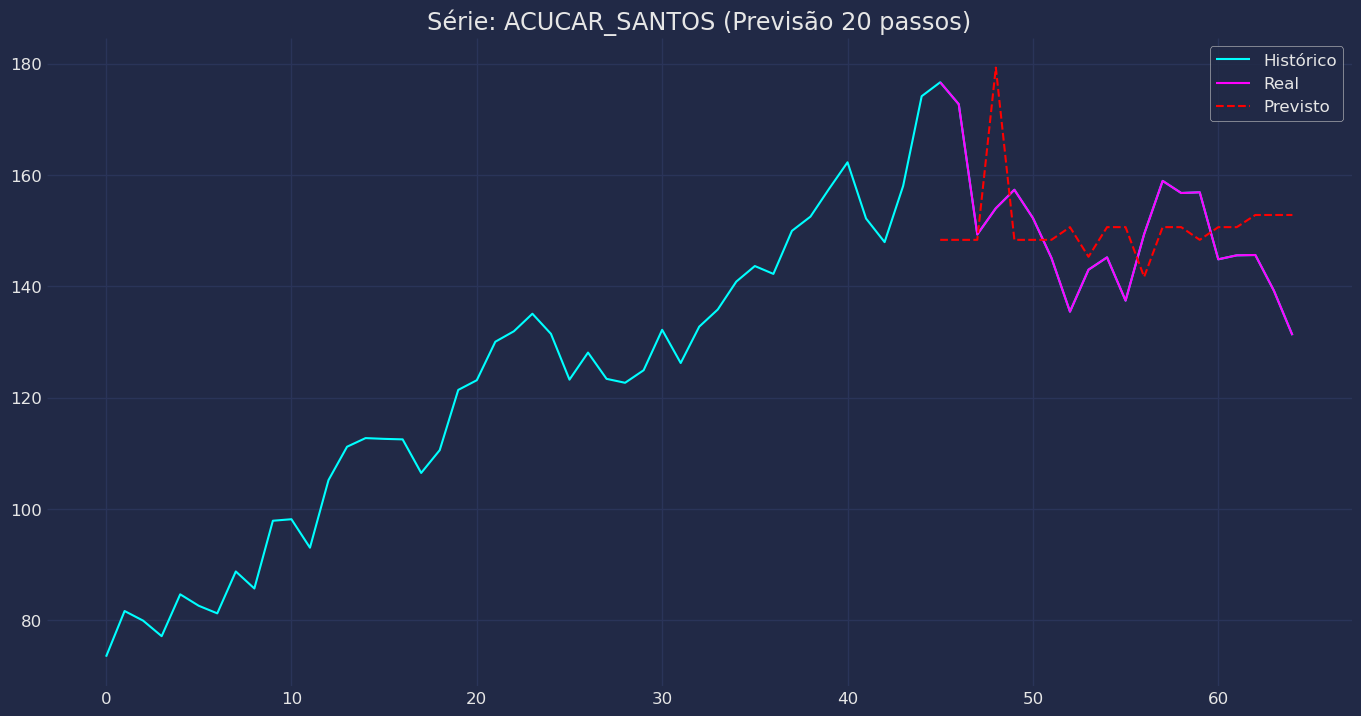


=== Série: ACUCAR_SP ===

=== Série: ACUCAR_SP (horizon=80) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num

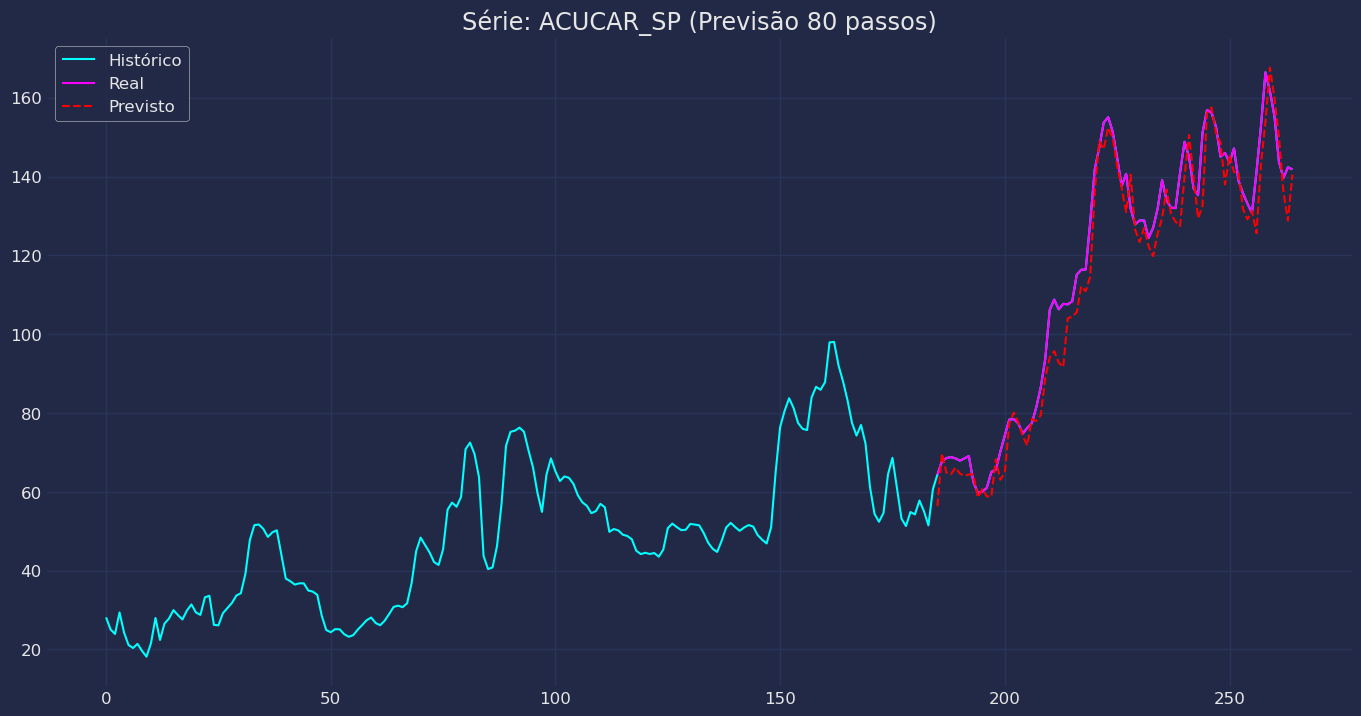


=== Série: ALGODAO ===

=== Série: ALGODAO (horizon=105) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_le

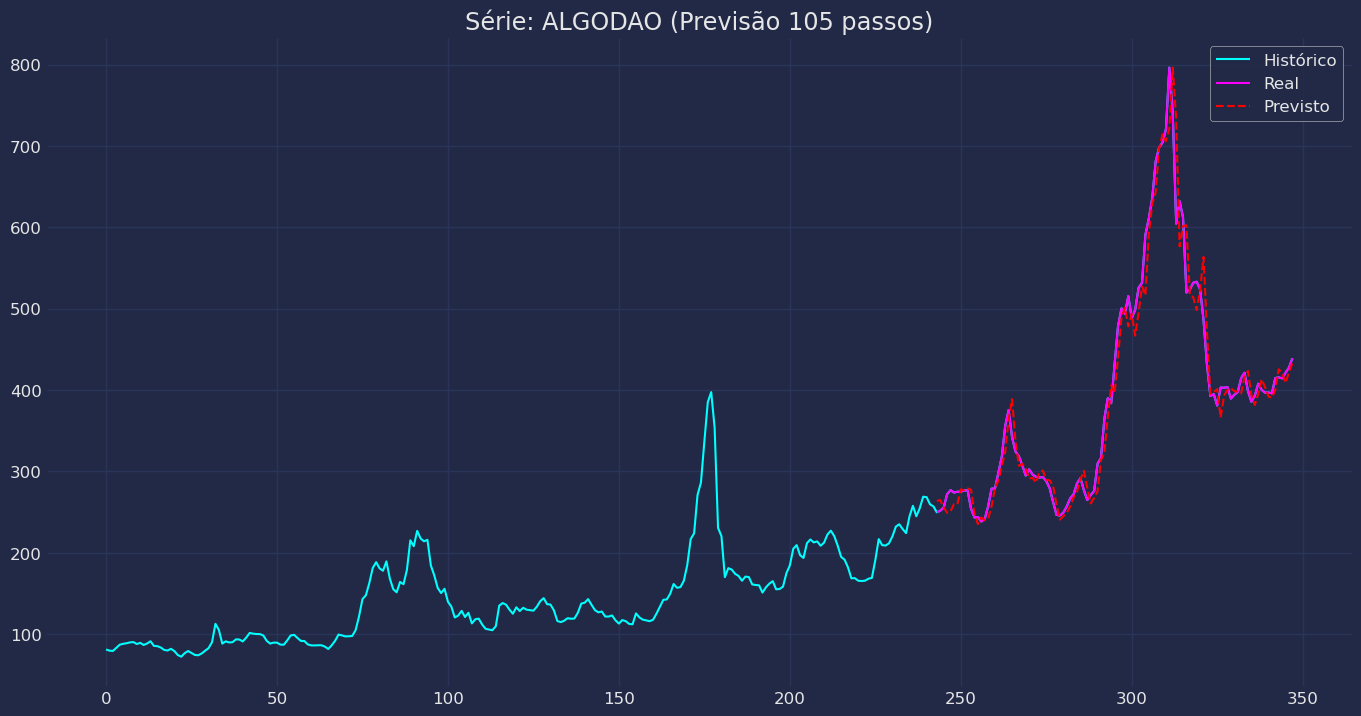


=== Série: ARROZ ===

=== Série: ARROZ (horizon=72) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=

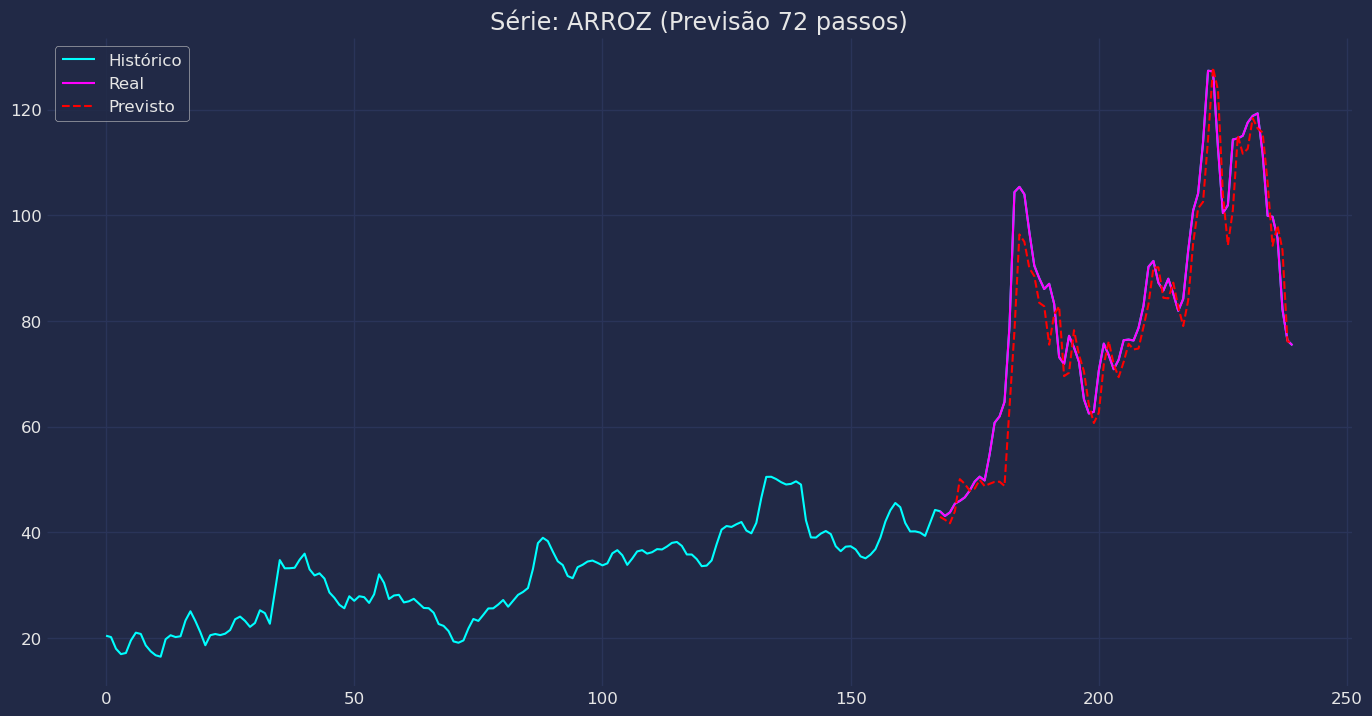


=== Série: CAFE_ARABICA ===

=== Série: CAFE_ARABICA (horizon=104) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
          

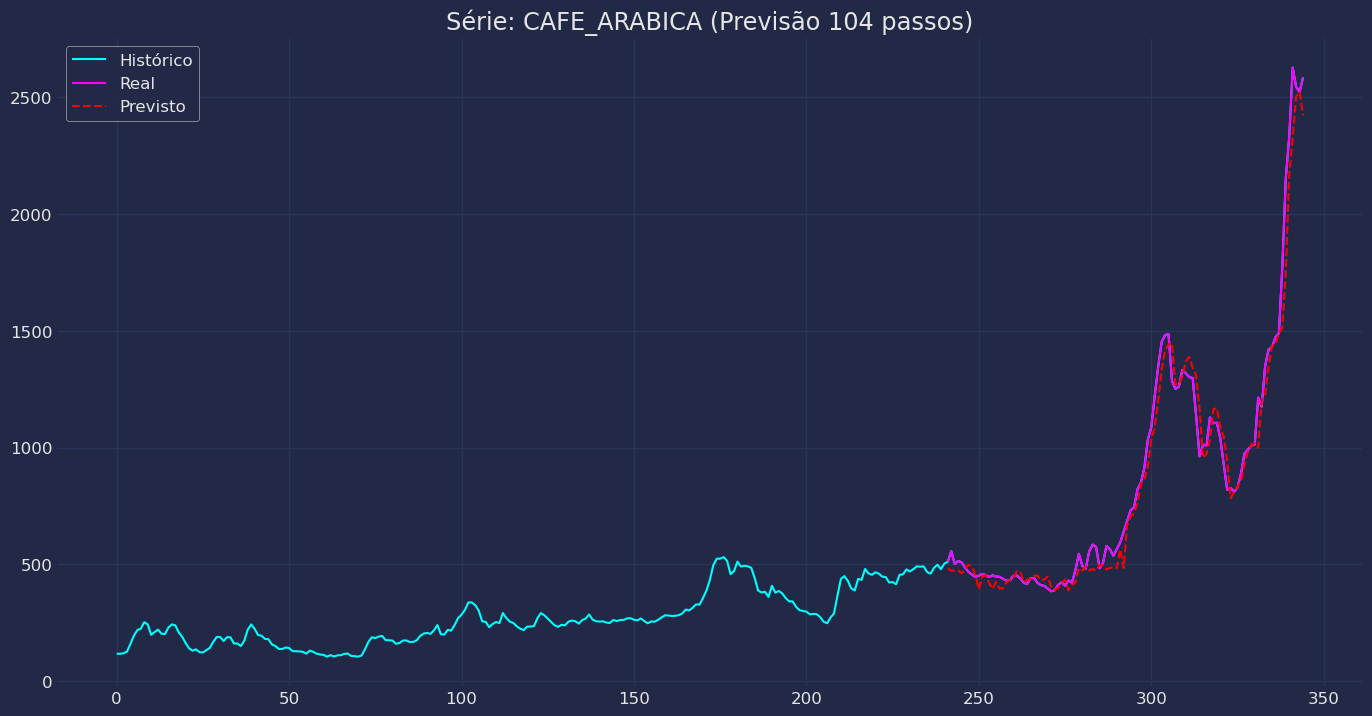


=== Série: CAFE_ROBUSTA ===

=== Série: CAFE_ROBUSTA (horizon=87) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
           

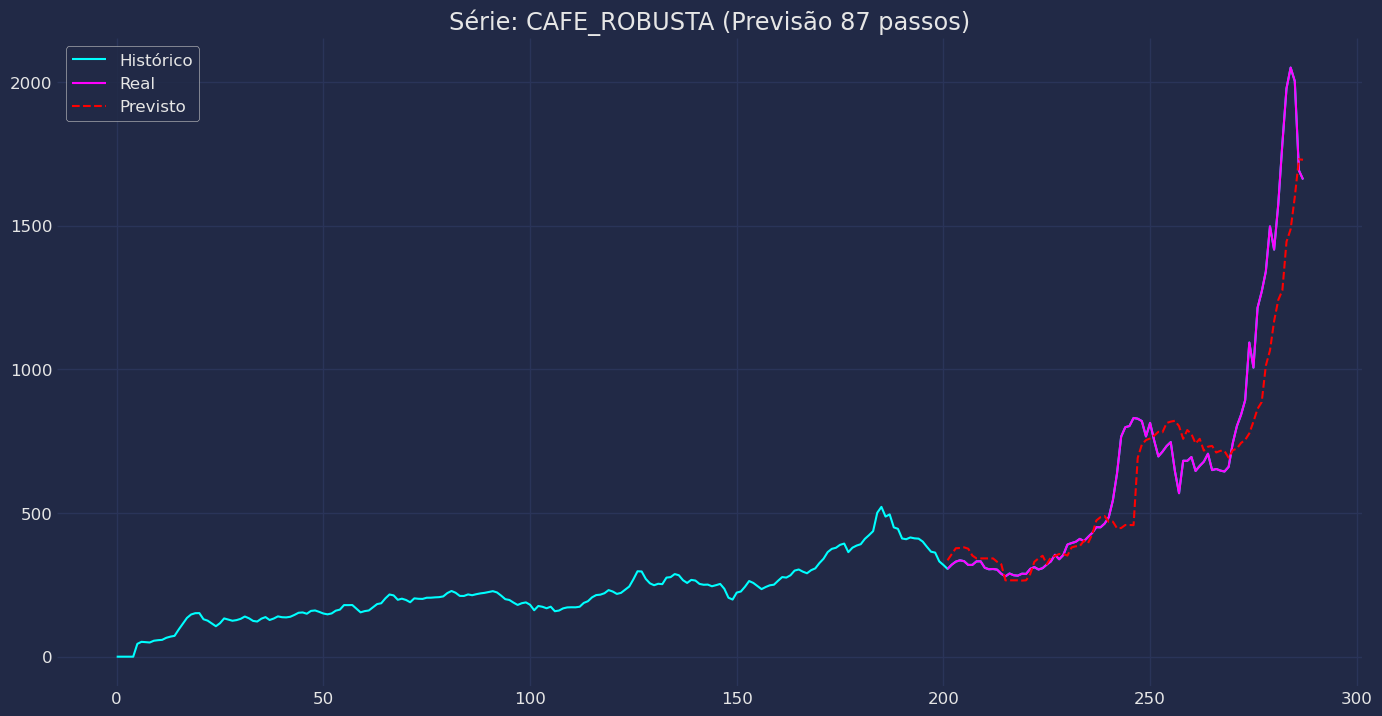


=== Série: MILHO ===

=== Série: MILHO (horizon=75) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=

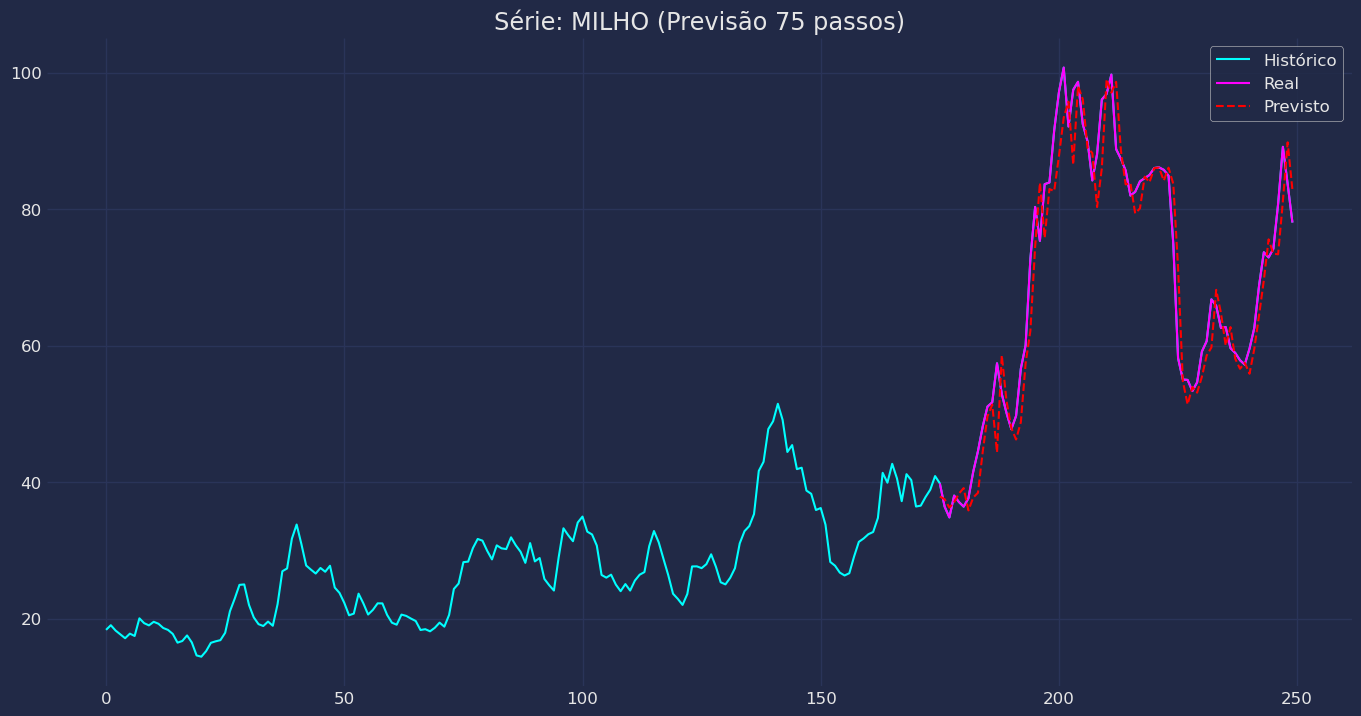


=== Série: SOJA_PARANA ===

=== Série: SOJA_PARANA (horizon=101) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
            

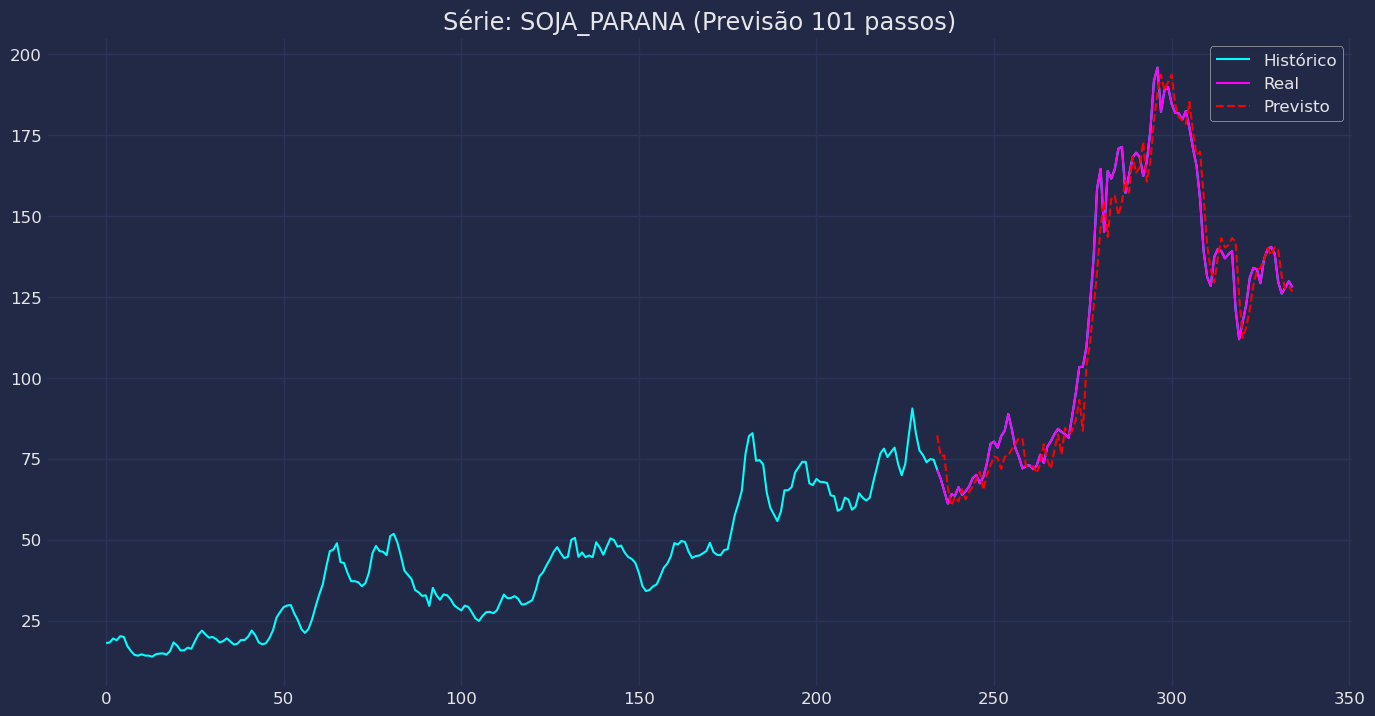


=== Série: SOJA_PARANAGUA ===

=== Série: SOJA_PARANAGUA (horizon=70) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
       

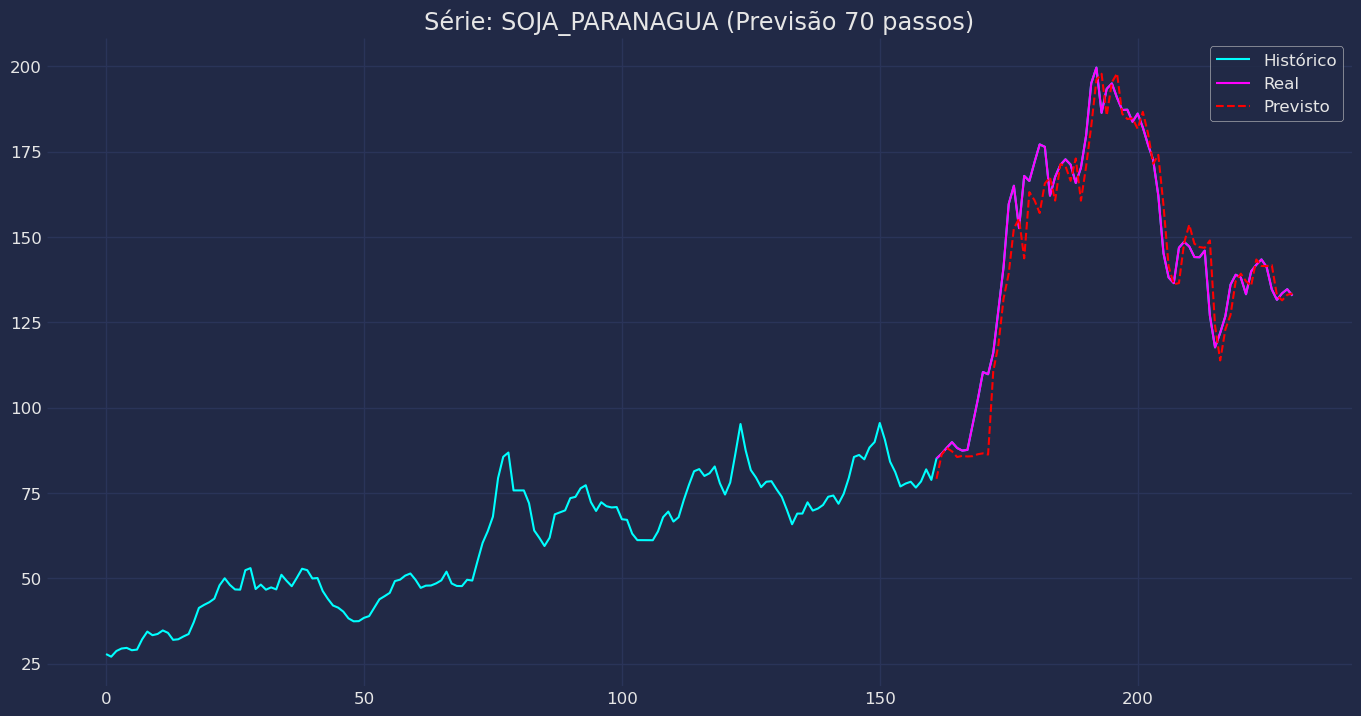


=== Série: TRIGO_PARANA ===

=== Série: TRIGO_PARANA (horizon=77) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRe

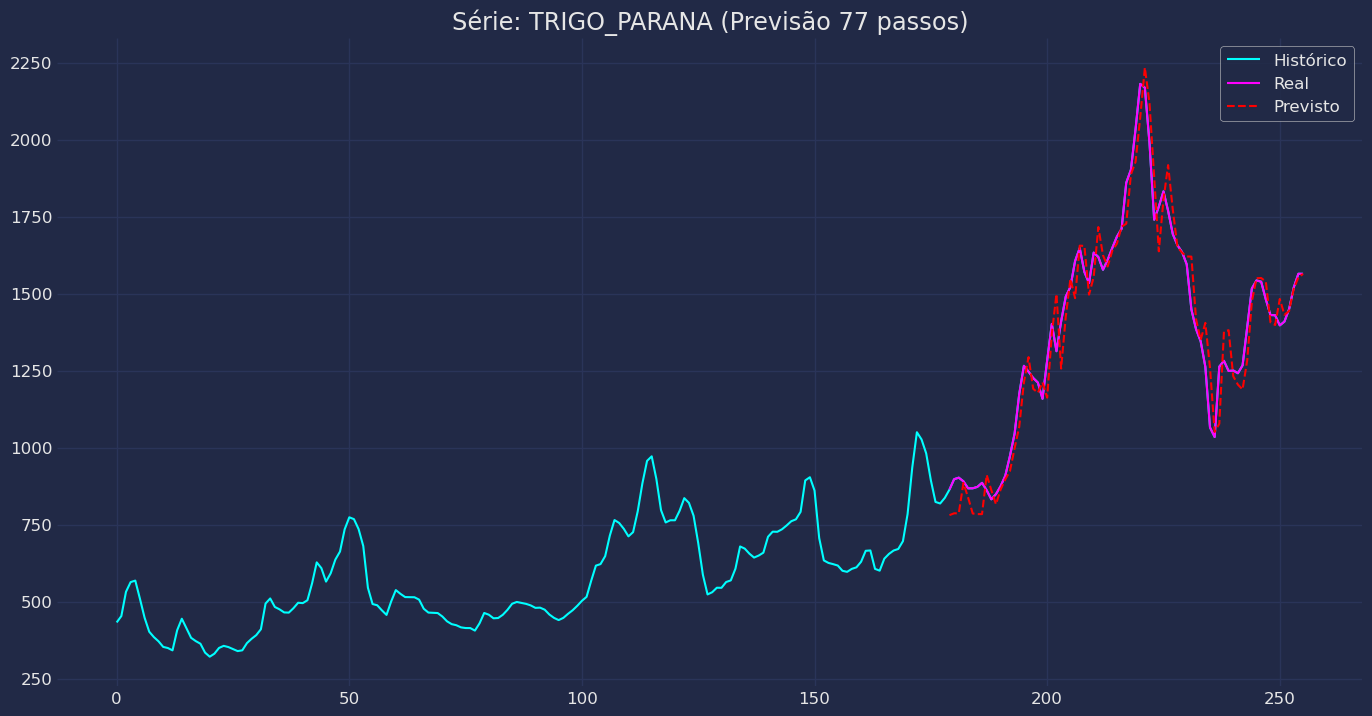


=== Série: TRIGO_RS ===

=== Série: TRIGO_RS (horizon=77) ===
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
MLPRegressor(h

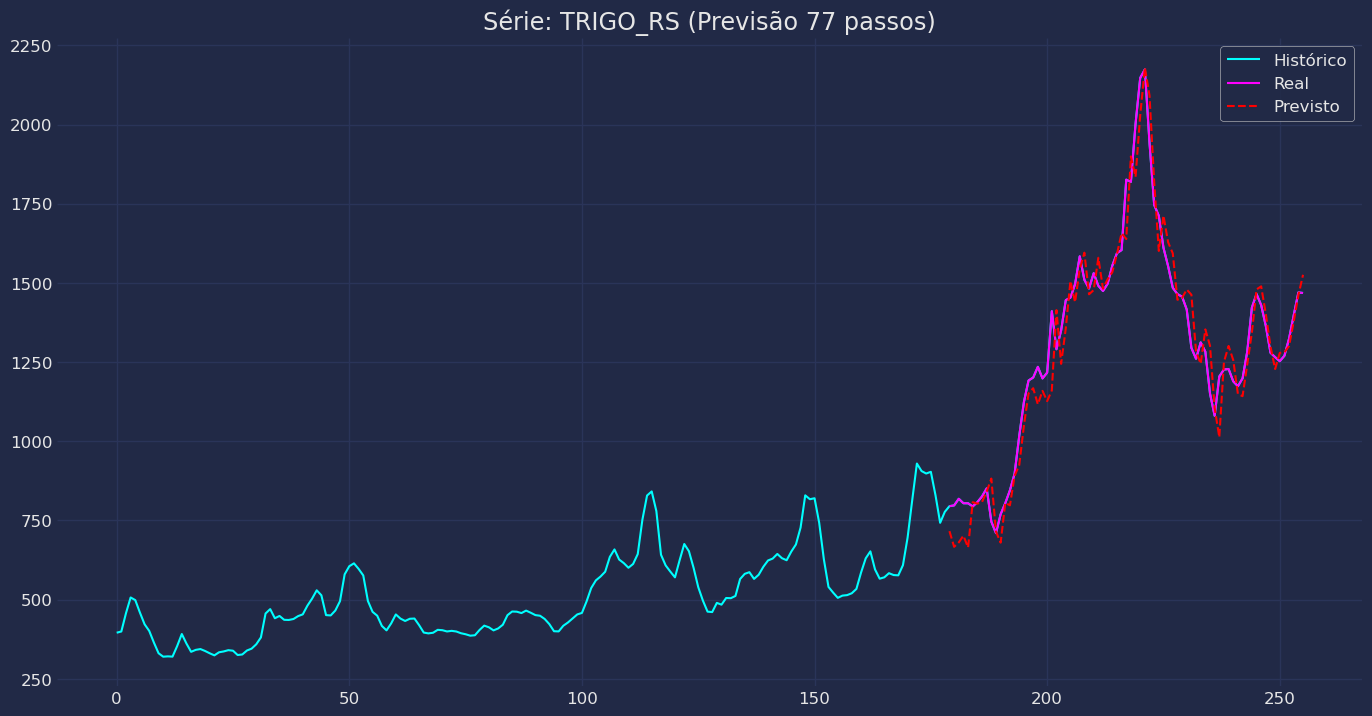


Resumo das métricas:
         unique_id           mse        rmse         mae      mape
0    ACUCAR_SANTOS    179.242166   13.388135   10.759777  0.071153
1        ACUCAR_SP     46.542369    6.822197    5.343186  0.047442
2          ALGODAO    735.779598   27.125258   17.791464  0.043255
3            ARROZ     47.511030    6.892825    5.018729  0.060340
4     CAFE_ARABICA   7983.012310   89.347705   58.703974  0.066585
5     CAFE_ROBUSTA  30905.167210  175.798655  109.247303  0.130182
6            MILHO     26.134303    5.112172    3.886053  0.056325
7      SOJA_PARANA     70.482107    8.395362    6.421948  0.055887
8   SOJA_PARANAGUA     81.065795    9.003655    6.503988  0.046016
9     TRIGO_PARANA   6833.763219   82.666579   64.246195  0.048929
10        TRIGO_RS   7245.991645   85.123391   66.459069  0.053612


In [11]:
dcs = DCSLARegressor(models_top_k_10, top_k=10, similarity='euclidean')

results = []

for uid in df_brl['unique_id'].unique():
    print(f"\n=== Série: {uid} ===")

    horizon = series_test_sizes.get(uid)
    print(f"\n=== Série: {uid} (horizon={horizon}) ===")
    y_series = df_brl[df_brl['unique_id'] == uid]['y'].values

    y_train = y_series[:-horizon]
    windows, targets = dcs._extract_lag_windows(y_train)
    dcs.fit(windows, targets)

    forecast, y_real_future = dcs.predict(y_series, horizon=horizon)

    mse = mean_squared_error(y_real_future, forecast)
    rmse = root_mean_squared_error(y_real_future, forecast)
    mae = mean_absolute_error(y_real_future, forecast)
    mape = mean_absolute_percentage_error(y_real_future, forecast)

    results.append({
        "unique_id": uid,
        "horizon": horizon,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "mape": mape,
        "y_real_future": y_real_future,
        "forecast": forecast
    })

    print("Valores reais:    ", np.round(y_real_future, 2).tolist())
    print("Valores previstos:", np.round(forecast, 2).tolist())
    print(f"MSE: {mse:.2f} | RMSE: {rmse:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")

    # plotar série inteira
    plt.figure(figsize=(15, 8))
    plt.plot(y_series, label="Histórico", color="cyan")
    plt.plot(range(len(y_series)-horizon, len(y_series)), y_real_future, label="Real", color="fuchsia")
    plt.plot(range(len(y_series)-horizon, len(y_series)), forecast, label="Previsto", color="red", linestyle="--")
    plt.title(f"Série: {uid} (Previsão {horizon} passos)")
    plt.legend()
    plt.show()

# Converter resultados em DataFrame para análise geral
df_results = pd.DataFrame(results)
print("\nResumo das métricas:")
print(df_results[["unique_id", "mse", "rmse", "mae", "mape"]])

In [12]:
for model in dcs.history_errors:
    print("############### Model ###############")
    print(model)
    print("Error history:")
    print(dcs.history_errors.get(model))
    print("Times used:")
    print(len(dcs.history_errors.get(model)))

############### Model ###############
LGBMRegressor(max_depth=10, min_child_samples=5, n_estimators=1000,
              num_leaves=63, random_state=42, reg_alpha=0, reg_lambda=0.01,
              verbose=-1)
Error history:
[28.323102469494017, 24.376983421874968, 0.9723255271381106, 9.002851842927583, 3.929983421874965, 3.240425669034124, 8.54495710608549, 7.193720615362821, 13.5986416679944, 21.597141667994407, 8.013345844849582, 2.006297117870787, 3.6644171262606307, 4.398598731862762, 2.3479355982073855, 3.2958189247078877, 4.360432400592529, 4.6935579244708805, 1.8406847672279483, 1.1151882423738897, 0.697439079718194, 2.189346212215277, 6.24073032335113, 2.6238954223530726, 7.118258372967624, 9.48282083830226, 1.1084877702424052, 3.436712079463021, 7.0813429800759735, 4.941711076883493, 12.062954336797375, 13.08353895319469, 13.519513604398739, 16.018464412756316, 14.066982288424867, 12.907727843415643, 0.28867075256698627, 22.81982845035401, 26.078915002126763, 14.350130638550809

-- top_k sendo 10 (10 janelas mais próximas)
-- top_k sendo 1 (1 janelas mais próximas)


-- aumentar o pool


-- implementar DSNAW